In [3]:
print("hello")

hello


In [11]:
import re
import pandas as pd

In [12]:
f = open('chat.txt','r',encoding = 'utf-8')

In [13]:
data = f.read()

In [14]:
print(data)

07/08/23, 8:27 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
07/08/23, 8:27 pm - You created group "Minor Project"
07/08/23, 8:30 pm - Shreya Purwar: Kanha has joined
07/08/23, 8:43 pm - Kanha Kesarwani B5 joined using this group's invite link
07/08/23, 8:43 pm - Kanha Kesarwani B5: Hey
07/08/23, 9:16 pm - Shreya Purwar: so wed ko discuss krte sabhi cheeezein
07/08/23, 9:21 pm - Kanha Kesarwani B5: <Media omitted>
07/08/23, 9:22 pm - Shreya Purwar: so wed ko discuss krte sabhi cheeezein
07/08/23, 9:28 pm - Navya Singh: Okay fine 👍🏻
08/08/23, 1:45 pm - Kanha Kesarwani B5: 45 minutes
3 slides 
👍🏼
08/08/23, 3:12 pm - Shreya Purwar: Sorry @917042799979 was busy when u called.. Tu bta de kal kb tujhe discuss krna h mai aa jaungi...
08/08/23, 3:18 pm - Kanha Kesarwani B5: No worries
08/08/23, 3:18 pm - Kanha Kesarwani B5: We can coordinate
08/08/23, 3:19 pm - Shreya Purwar: Theek.. Bta dio mujh

In [15]:
pattern = "\d{2}\/\d{2}/\d{2}\, \d{1,2}\:\d{2}\\s[apAP][Mm]"

In [16]:
messages = re.split(pattern, data)[1:]
len(messages)

1212

In [17]:
dates = re.findall(pattern, data)
dates

['07/08/23, 8:27\u202fpm',
 '07/08/23, 8:27\u202fpm',
 '07/08/23, 8:30\u202fpm',
 '07/08/23, 8:43\u202fpm',
 '07/08/23, 8:43\u202fpm',
 '07/08/23, 9:16\u202fpm',
 '07/08/23, 9:21\u202fpm',
 '07/08/23, 9:22\u202fpm',
 '07/08/23, 9:28\u202fpm',
 '08/08/23, 1:45\u202fpm',
 '08/08/23, 3:12\u202fpm',
 '08/08/23, 3:18\u202fpm',
 '08/08/23, 3:18\u202fpm',
 '08/08/23, 3:19\u202fpm',
 '08/08/23, 3:25\u202fpm',
 '08/08/23, 3:25\u202fpm',
 '08/08/23, 3:26\u202fpm',
 '08/08/23, 3:26\u202fpm',
 '08/08/23, 3:27\u202fpm',
 '08/08/23, 3:28\u202fpm',
 '08/08/23, 3:28\u202fpm',
 '08/08/23, 3:28\u202fpm',
 '08/08/23, 3:29\u202fpm',
 '08/08/23, 3:29\u202fpm',
 '08/08/23, 3:29\u202fpm',
 '08/08/23, 3:29\u202fpm',
 '08/08/23, 3:29\u202fpm',
 '08/08/23, 3:30\u202fpm',
 '08/08/23, 3:30\u202fpm',
 '08/08/23, 4:21\u202fpm',
 '08/08/23, 4:22\u202fpm',
 '08/08/23, 5:47\u202fpm',
 '08/08/23, 8:12\u202fpm',
 '08/08/23, 9:28\u202fpm',
 '08/08/23, 9:28\u202fpm',
 '09/08/23, 11:16\u202fam',
 '09/08/23, 11:54\u202fam',

In [18]:
df = pd.DataFrame({'user_message':messages, 'message_date':dates})
#convert message_date type

df.rename(columns={'message_date':'date'},inplace=True)
df.head() #printing 1st five entries

,user_message,date
0,- Messages and calls are end-to-end encrypted...,"07/08/23, 8:27 pm"
1,"- You created group ""Minor Project""\n","07/08/23, 8:27 pm"
2,- Shreya Purwar: Kanha has joined\n,"07/08/23, 8:30 pm"
3,- Kanha Kesarwani B5 joined using this group'...,"07/08/23, 8:43 pm"
4,- Kanha Kesarwani B5: Hey\n,"07/08/23, 8:43 pm"


In [19]:
#separate users and messages
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:# user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append ('group_notification' )
        messages.append(entry[0])
df['user']= users
df['message'] = messages
df.drop(columns=['user_message'],inplace=True)

In [20]:
print(df.head())

                date                   user  \
0  07/08/23, 8:27 pm     group_notification   
1  07/08/23, 8:27 pm     group_notification   
2  07/08/23, 8:30 pm        - Shreya Purwar   
3  07/08/23, 8:43 pm     group_notification   
4  07/08/23, 8:43 pm   - Kanha Kesarwani B5   

                                             message  
0   - Messages and calls are end-to-end encrypted...  
1              - You created group "Minor Project"\n  
2                                 Kanha has joined\n  
3   - Kanha Kesarwani B5 joined using this group'...  
4                                              Hey\n  


In [21]:
df.columns

Index(['date', 'user', 'message'], dtype='object')

In [22]:
print(df.shape)

(1212, 3)


In [23]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [24]:
len(words)

10324

In [18]:
print(words)

['-', 'Messages', 'and', 'calls', 'are', 'end-to-end', 'encrypted.', 'No', 'one', 'outside', 'of', 'this', 'chat,', 'not', 'even', 'WhatsApp,', 'can', 'read', 'or', 'listen', 'to', 'them.', 'Tap', 'to', 'learn', 'more.', '<Media', 'omitted>', 'Thanks', 'Nahi', 'karna', 'file', 'mein', 'kaam', 'maine', 'poocha', 'abhi', 'kisise', 'main', 'bhi', 'nahi', 'kar', 'raha.', 'Ok.', 'Thanks🙂', 'Shreya', 'aaj', 'hamari', 'workshop', 'hai', 'but', 'actually', 'I', 'am', 'not', 'well', 'today', 'mujhe', 'kal', 'shaam', 'se', 'hi', 'bahut', 'weakness', 'hai', 'aur', 'bodyache', 'hai', 'aur', 'thoda', 'cold', 'bhi', 'tha', 'isiliye', 'agar', 'main', 'theek', 'hogaya', 'toh', 'aajaunga', '2pm', 'tak', 'varna', 'tum', 'please', 'sir', 'ko', 'inform', 'kardena', 'kyuki', 'tum', 'meri', 'group', 'member', 'ho', 'isiliye', 'tum', 'hi', 'boldena.', 'Ok', 'Workshop', '1bje', 'se', 'h', 'vaise', 'Hi', 'Tu', 'engineering', 'workshop', 'ke', 'lecture', 'mein', 'aaya', 'tha?', 'Pls', 'notes', 'bhej', 'de', 'us

In [25]:
df[df['message']=='<Media omitted>\n'].shape[0]

51

In [36]:
! pip install urlextract

In [26]:
from urlextract import URLExtract
extractor = URLExtract()
y=[]
for message in df['message']:
    y.extend(extractor.find_urls(message))

In [27]:
print(y)

['https://www.interviewbit.com/blog/big-data-projects/?amp=1', 'https://elomia.com/', 'https://woebothealth.com/', 'https://www.makeuseof.com/ai-chatbot-therapist-mobile-apps-pocket/', 'https://www.aimblog.io/2021/03/02/these-chatbots-are-helping-with-mental-health-right-now/', 'https://www.wired.co.uk/article/mental-health-chatbots', 'https://www.scientificamerican.com/article/ai-chatbots-could-help-provide-therapy-but-caution-is-needed/', 'https://www.theguardian.com/us-news/2022/apr/13/chatbots-robot-therapists-youth-mental-health-crisis', 'https://dl.acm.org/doi/abs/10.1145/3394486.3406469', 'https://www.cio.com/article/418948/how-graph-analytics-is-helping-improve-personalized-healthcare.html', 'https://www.calvinzang.com/kdd2020_tutorial_medical_graph_analytics.html', 'https://www.udemy.com/course/real-world-data-science-machine-learning-projects/', 'https://www.udemy.com/course/real-world-data-science-projects-practically/', 'https://www.studocu.com/in/document/shri-vaishnav-vid

In [28]:
print(len(y))

31


In [29]:
!pip show matplotlib


Name: matplotlib
Version: 3.7.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: C:\Users\shrey\anaconda3\Lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn, wordcloud


In [25]:
!pip install matplotlib

In [30]:
import matplotlib.pyplot as plt

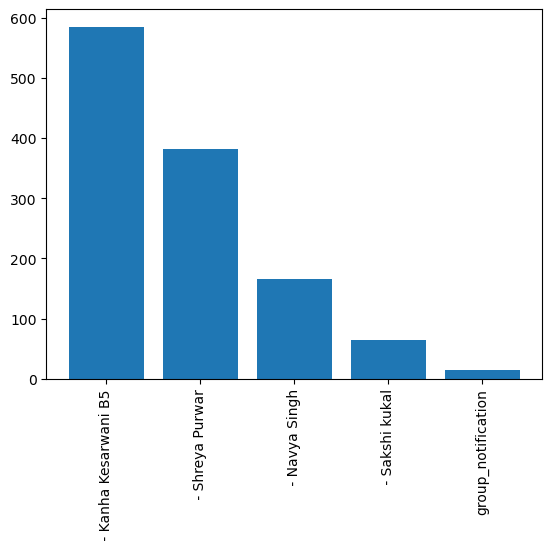

In [31]:
x= df['user'].value_counts().head()
name=x.index
count=x.values
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [32]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index()

,user,count
0,- Kanha Kesarwani B5,48.27
1,- Shreya Purwar,31.52
2,- Navya Singh,13.70
3,- Sakshi kukal,5.36
4,group_notification,1.16


In [33]:
!pip install wordcloud

In [34]:
from wordcloud import WordCloud


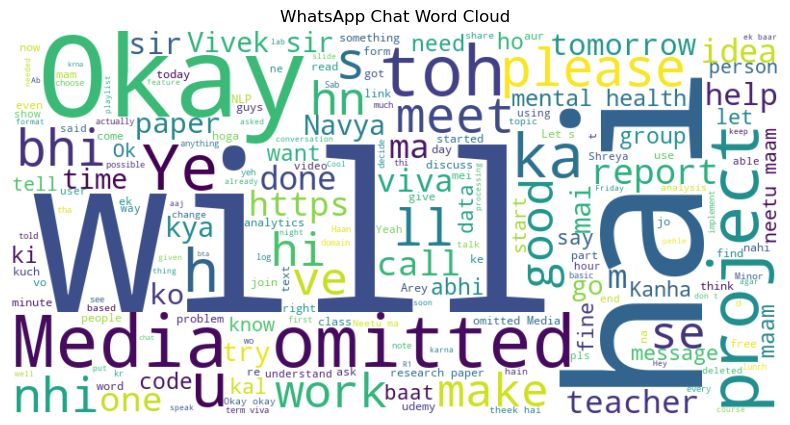

In [35]:
wc = WordCloud(width=800, height=400, background_color='white')
wordcloud = wc.generate(' '.join(df['message']))

# Step 3: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WhatsApp Chat Word Cloud')
plt.show()

In [36]:
from collections import Counter
 

In [49]:
file = open('stopwords.txt', 'r', encoding='utf-8')

stopwords = file.read()

stopwords = stopwords.split("\n")  
print(stopwords)
temp = df[(df['user'] != 'Group Notification') |
              (df['user'] != '<Media omitted>')] 
words = []
for message in temp['message']:
        for word in message.lower().split():
            if word not in stopwords:
                words.append(word)     
   
    

      
mostcommon = pd.DataFrame(Counter(words).most_common(20))   
 

['0o', '0s', '3a', '3b', '3d', '6b', '6o', 'a', 'a1', 'a2', 'a3', 'a4', 'ab', 'able', 'about', 'above', 'abst', 'ac', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'ad', 'added', 'adj', 'ae', 'af', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'ag', 'again', 'against', 'ah', 'ain', "ain't", 'aj', 'al', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'ao', 'ap', 'apart', 'apparently', 'appear', 'appreciate', 'appropriate', 'approximately', 'ar', 'are', 'aren', 'arent', "aren't", 'arise', 'around', 'as', "a's", 'aside', 'ask', 'asking', 'associated', 'at', 'au', 'auth', 'av', 'available', 'aw', 'away', 'awfully', 'ax', 'ay', 'az', 'b', 'b1', 'b2', 'b3', 'ba', 'back', 'bc', 'bd', 'be', 'became', 'because', 'become', 'becomes', 'be

In [50]:
! pip install emoji



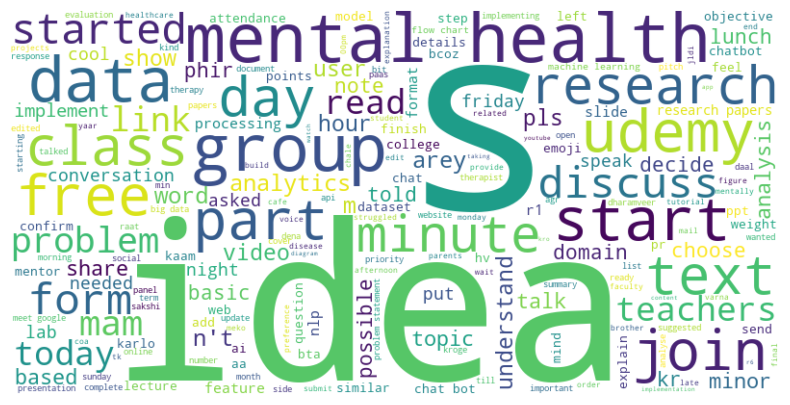

In [50]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from nltk.tokenize import word_tokenize

# Assuming 'df' is your DataFrame with a 'message' column

# Combine all messages into a single string
combined_text = " ".join(df['message'])

# Tokenize the text and remove stopwords

words = word_tokenize(combined_text)

# Use a different variable name for your filtered words
filtered_words = [word.lower() for word in words if word.lower() not in stopwords]

# Join the filtered words back into a single string
filtered_text = " ".join(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [50]:
import pandas as pd
import emoji



def count_user_emojis(df, user_name):
    user_emojis = {}  # Dictionary to store emoji counts

    # Iterate through the DataFrame
    for index, row in df.iterrows():
        message = row['message']

        # Check if the message is from the specified user
        if row['user'] == f"- {user_name}":
            # Use emoji library to extract emojis from the message
            emojis = [c for c in message if c in emoji.UNICODE_EMOJI]
            
            # Update the emoji counts for the user
            for emoji_char in emojis:
                if emoji_char in user_emojis:
                    user_emojis[emoji_char] += 1
                else:
                    user_emojis[emoji_char] = 1

    return user_emojis

# Example usage
user_name = " - Shreya Purwar"
emoji_counts = count_user_emojis(df, user_name)

# Print the emoji counts for the user
if emoji_counts:
    print(f"Emoji counts for {user_name}:")
    for emoji_char, count in emoji_counts.items():
        print(f"{emoji_char}: {count}")
else:
    print(f"No emojis found for {user_name}.")


No emojis found for  - Shreya Purwar.


In [52]:
print(df['user'])

0          group_notification
1          group_notification
2             - Shreya Purwar
3          group_notification
4        - Kanha Kesarwani B5
                ...          
1207          - Shreya Purwar
1208          - Shreya Purwar
1209          - Shreya Purwar
1210          - Shreya Purwar
1211          - Shreya Purwar
Name: user, Length: 1212, dtype: object


In [177]:
import pandas as pd
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
from gensim.models import LdaModel

# Assuming 'message' is the column in your DataFrame that contains the text data
documents = df['message']

# Define a function to read stopwords from an external file
def load_stopwords(stopwords_file):
    with open(stopwords_file, 'r', encoding='utf-8') as file:
        stopwords = [line.strip(',') for line in file]
    return set(stopwords)

# Load English and Hindi stopwords from external files
english_stopwords = stopwords


# Tokenize and remove stopwords
filtered_texts = []

for doc in documents:
    words = word_tokenize(doc.lower())
    filtered_words = [word for word in words if word not in english_stopwords]
    filtered_texts.append(filtered_words)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(filtered_texts)
corpus = [dictionary.doc2bow(text) for text in filtered_texts]

# Set the number of topics
num_topics = 30

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics and their top words
topics = lda_model.print_topics(num_topics=num_topics, num_words=6)

for topic in topics:
    print(topic)


(0, '0.069*"’" + 0.029*"shreya" + 0.023*"10" + 0.017*"mam" + 0.017*"afternoon" + 0.014*"minutes"')
(1, '0.096*"started" + 0.018*"padhna" + 0.018*"kesarwani" + 0.018*"b5" + 0.018*"clg" + 0.009*"watched"')
(2, '0.031*"confirm" + 0.025*"’" + 0.025*"lunch" + 0.025*"jaldi" + 0.017*"cafe" + 0.016*"confident"')
(3, '0.045*"teacher" + 0.024*"kr" + 0.023*"analyser" + 0.018*"\'s" + 0.018*"chat" + 0.013*"’"')
(4, '0.042*"\'s" + 0.018*"free" + 0.018*"show" + 0.018*"12" + 0.018*"lena" + 0.009*"web"')
(5, '0.029*"udemy" + 0.022*"group" + 0.015*"chalana" + 0.015*"phir" + 0.015*"beech" + 0.015*"accommodate"')
(6, '0.065*"’" + 0.030*"👍🏻" + 0.017*"mental" + 0.013*"health" + 0.013*"chat" + 0.013*"format"')
(7, '0.026*"feel" + 0.017*"complete" + 0.017*"videos" + 0.011*"vivas" + 0.009*"details" + 0.009*"implement"')
(8, '0.017*"pr" + 0.015*"’" + 0.015*"analytics" + 0.015*"decide" + 0.015*"remaining" + 0.009*"aa"')
(9, '0.049*"night" + 0.047*"\'m" + 0.035*"discuss" + 0.028*"’" + 0.028*"sunday" + 0.028*"saks

In [148]:
import matplotlib.pyplot as plt

In [150]:
df.columns

Index(['date', 'user', 'message'], dtype='object')

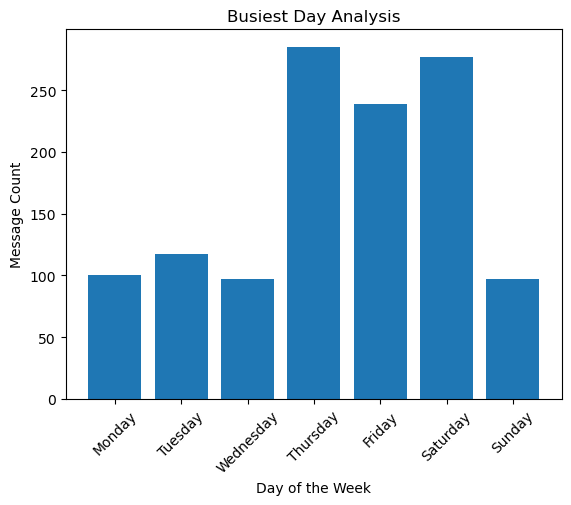

The busiest day is Thursday with 285 messages.


In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your WhatsApp chat data into a DataFrame
# If not, you can load it like this:
# df = pd.read_csv("your_whatsapp_data.csv")

# Convert the "date" column to datetime.
# Correct the date format based on your data
# Correct the date format based on your data
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y, %I:%M %p')



# Extract the day of the week from timestamps (0=Monday, 6=Sunday).
df['day_of_week'] = df['date'].dt.dayofweek

# Count the number of messages for each day of the week.
day_message_counts = df['day_of_week'].value_counts().sort_index()

# Define a mapping of day names for plotting.
day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Plot the message counts for each day.
plt.bar(day_names, day_message_counts)
plt.xlabel("Day of the Week")
plt.ylabel("Message Count")
plt.title("Busiest Day Analysis")
plt.xticks(rotation=45)
plt.show()

# Find the busiest day.
busiest_day = day_names[day_message_counts.idxmax()]
print(f"The busiest day is {busiest_day} with {day_message_counts.max()} messages.")


In [204]:
from collections import Counter
import pandas as pd


# Tokenize and clean the text
messages = df['message'].str.lower().str.split()

messages = messages.apply(lambda tokens: [word for word in tokens if  word not in 'stopwords.txt'])

# Calculate word frequencies
word_frequencies = Counter(word for words in messages for word in words)

# Display word frequencies
print(word_frequencies.most_common())


[('the', 190), ('and', 167), ('we', 158), ('i', 148), ('you', 137), ('it', 124), ('a', 113), ('can', 108), ('will', 92), ('of', 85), ('in', 85), ('is', 85), ('if', 82), ('be', 80), ('for', 77), ('hai', 72), ('with', 66), ('this', 64), ('on', 61), ('okay', 60), ('as', 57), ('that', 52), ('<media', 51), ('omitted>', 51), ('have', 48), ('toh', 46), ('do', 42), ('but', 41), ('what', 40), ('sir', 39), ('bhi', 39), ('ma’am', 39), ('are', 36), ('not', 35), ('so', 35), ('please', 35), ('me', 35), ('project', 34), ('@919426610817', 34), ('ka', 34), ('@918923887646', 32), ('by', 32), ('too', 31), ('nhi', 31), ('then', 30), ('our', 30), ('neetu', 30), ('se', 29), ('good', 29), ('meet', 29), ('from', 28), ('just', 28), ('was', 27), ('hi', 27), ('yes', 27), ('your', 27), ('one', 26), ('h', 26), ('call', 26), ('work', 26), ('my', 26), ('maam', 26), ('viva', 26), ('make', 25), ('get', 25), ('done', 25), ('report', 25), ('hn', 24), ('also', 24), ('would', 24), ('all', 24), ('about', 24), ('kya', 24), 

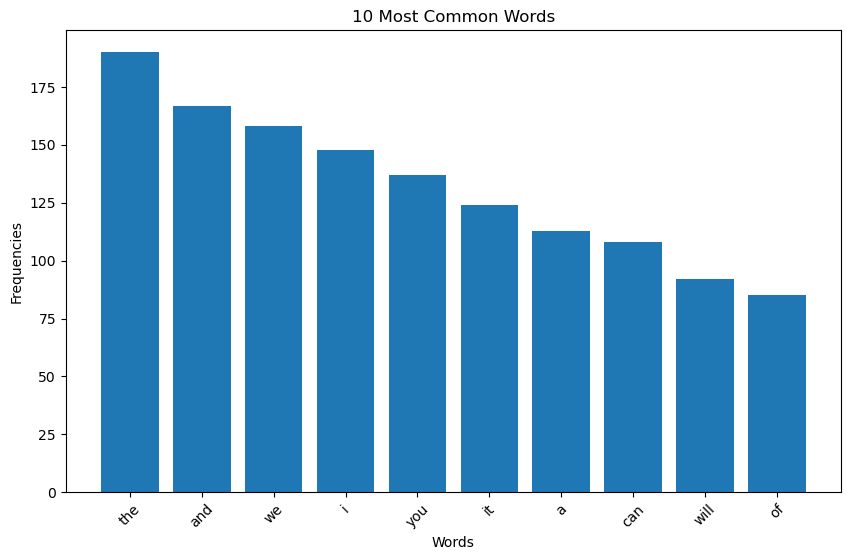

In [186]:
import matplotlib.pyplot as plt

# Assuming you've already calculated the word frequencies as shown in the previous code
word_frequencies = Counter(word for words in messages for word in words)

# Get the 10 most common words
most_common_words = word_frequencies.most_common(10)

# Separate the words and their frequencies
words, frequencies = zip(*most_common_words)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('10 Most Common Words')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()
